<a href="https://colab.research.google.com/github/Abhi-Gan/Odyssey-Sentiment-Analysis/blob/main/Mythology_Final_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Goal of this code is to produce a DataFrame that can easily be used to perform visual and statistical analysis to answer the following questions:

*   “to what extent does the manner in which a character is framed relate to their demographic background (gender, economic status, creature type) in the Odyssey?”
*   “to what extent does the translator of a work of literature affect the manner in which these characters are framed?”

# Data Preprocessing Functions

In [1]:
# used to directly read txt files from url's
import urllib

In [2]:
import string
import re

In [3]:
# param txt_url is the url of the text file
# returns string version of text file at that url
def get_str(txt_url):
  with urllib.request.urlopen(txt_url) as url:
    return str(url.read())

In [4]:
# function that performs cleaning as desired
# does not split into sentences
def clean_text_no_split(raw_txt):
  # weird chars are preceded w \\
  # can be \\0x-- or \\escape char
  # replace these chars w space
  clean_txt = re.sub("\\\\x[a-f0-9][a-f0-9]|\\\\.",' ', raw_txt)
  # also replace numbers bc there seem to be numbers that show up later
  clean_txt = re.sub("\\d+",' ', clean_txt)
  # replace long spaces w only 1
  clean_txt = re.sub(" +",' ', clean_txt)

  # lowercase just in case
  clean_txt = clean_txt.lower()
  # we might have s or t that appear on their own cuz contractions/ownership
  clean_txt = re.sub(" s | t ",' ', clean_txt)

  # no need to get rid of punctuation since using TextBlob

  return clean_txt

# Sentence Dataframe Creation Function

In [5]:
from textblob import TextBlob

In [6]:
import nltk

In [7]:
# download necessary packages for TextBlob
#nltk.download('wordnet')
nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import pandas as pd

In [9]:
# words_of_interest is a list of lists to acommodate for chars w different versions of same name
def get_sent_df(text_blob, words_of_interest):
  data = []

  for sentence in text_blob.sentences:
    row_dict = {}
    row_dict["sentence"] = str(sentence)
    # find sentiment of num_sentences
    row_dict["polarity"] = sentence.sentiment.polarity
    row_dict["subjectivity"] = sentence.sentiment.subjectivity
    # find if there is a character in this sentence
    num_matches = 0
    for word_list in words_of_interest:
      main_version = word_list[0]
      # go through each version of the word until you find one of them in the sentence
      i = 0
      word_found = False
      while(i < len(word_list) and not word_found):
        word = word_list[i]
        word_found = word in sentence
        row_dict[main_version] = word_found
        # iterate i
        i += 1
      # increment count of number of words in the list included in this sentence
      num_matches += word_found
    # just for quick accessibility later
    row_dict["num_matches"] = num_matches
    # add this sentence to dataframe
    data.append(row_dict)

  return pd.DataFrame(data)

In [10]:
# performs preprocessing and turning into TextBlob
# also goes from Textblob to sent_df
def get_df_from_rel_str(relevant_str, words_of_interest):
  clean_full = clean_text_no_split(relevant_str)
  return get_sent_df(TextBlob(clean_full), words_of_interest)

# Running on different translations of Odyssey

In [11]:
# first let's create the list of characters of interest 
# will be the same for all translations of Odyssey
chars_of_interest = [["odysseus", "ulysses"], ["telemachus"], ["penelope"], 
                     ["athena","minerva","athene"], ["calypso"], ["circe"], 
                     ["polyphemus", "polypheme"], ["scylla"], ["antinous", "antino"], 
                     ["eumaeus", "eum"], ["euryclea", 'eurycleia'], ["zeus", "jove"], 
                     ["poseidon", "neptune"]]

In [12]:
plain_char_list = [word_list[0] for word_list in chars_of_interest]

## Butler

In [13]:
# https://www.gutenberg.org/ebooks/1727
butl_str = get_str("https://www.gutenberg.org/cache/epub/1727/pg1727.txt")

In [14]:
# preview string - need to find beginning and ending of Odyssey
butl_str[0:500]

"b'\\xef\\xbb\\xbfThe Project Gutenberg eBook of The Odyssey, by Homer\\r\\n\\r\\nThis eBook is for the use of anyone anywhere in the United States and\\r\\nmost other parts of the world at no cost and with almost no restrictions\\r\\nwhatsoever. You may copy it, give it away or re-use it under the terms\\r\\nof the Project Gutenberg License included with this eBook or online at\\r\\nwww.gutenberg.org. If you are not located in the United States, you\\r\\nwill have to check the laws of the country where you are l"

In [15]:
# get rid of everything before "THE beginning of" and after "FOOTNOTES"
start_idx = butl_str.find("THE GODS IN COUNCIL")
end_idx = butl_str.find("FOOTNOTES", start_idx)

In [16]:
# verify start and end are correct
print("start area:")
print(butl_str[start_idx - 200:start_idx+200])
print("end area:")
print(butl_str[end_idx - 200:end_idx+200])

start area:
y\xe2\x80\x99s School of Art in Streatham Street, Bloomsbury.\r\n\r\nHENRY FESTING JONES.\r\n\r\n 120 MAIDA VALE, W.9.\r\n4th _December_, 1921.\r\n\r\nTHE ODYSSEY\r\n\r\n\r\n\r\n\r\nBOOK I\r\n\r\n\r\nTHE GODS IN COUNCIL\xe2\x80\x94MINERVA\xe2\x80\x99S VISIT TO ITHACA\xe2\x80\x94THE CHALLENGE FROM\r\nTELEMACHUS TO THE SUITORS.\r\n\r\n\r\nTell me, O Muse, of that ingenious hero who travelled far and
end area:
us spoke Minerva, and Ulysses obeyed her gladly. Then Minerva assumed\r\nthe form and voice of Mentor, and presently made a covenant of peace\r\nbetween the two contending parties.\r\n\r\n\r\n\r\n\r\nFOOTNOTES:\r\n\r\n[1] [ Black races are evidently known to the writer as stretching all\r\nacross Africa, one half looking West on to the Atlantic, and the other\r\nEast on to the Indian Ocean.]\r\n\r


In [17]:
butl_relevant = butl_str[start_idx:end_idx]

In [18]:
butl_sent_df = get_df_from_rel_str(butl_relevant, chars_of_interest)

In [19]:
butl_sent_df.head()

,sentence,polarity,subjectivity,odysseus,telemachus,penelope,athena,calypso,circe,polyphemus,scylla,antinous,eumaeus,euryclea,zeus,poseidon,num_matches
0,the gods in council minerva visit to ithaca th...,0.000000,0.000000,False,True,False,True,False,False,False,False,False,False,False,False,False,2
1,"tell me, o muse, of that ingenious hero who tr...",0.250000,0.850000,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,"many cities did he visit, and many were the na...",0.425000,0.631250,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,"tell me, too, about all these things, oh daugh...",0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,True,False,1
4,so now all who escaped death in battle or by s...,0.357143,0.464286,True,False,False,False,True,False,False,False,False,False,False,False,False,2


## Butcher

In [20]:
# https://www.gutenberg.org/ebooks/1728
butch_str = get_str("https://www.gutenberg.org/files/1728/1728-0.txt")

In [21]:
# let's get rid of everything before "THE beginning of" and after "FOOTNOTES"
start_idx = butch_str.find("In a Council of the Gods")
end_idx = butch_str.find("End of the Project Gutenberg", start_idx)

In [22]:
# verify start and end are correct
print("start area:")
print(butch_str[start_idx-50:start_idx+500])
print("end area:")
print(butch_str[end_idx - 200:end_idx+200])

start area:
\r\nThe Odyssey\r\n\r\n\r\n\r\nBOOK I.\r\n\r\n\r\nIn a Council of the Gods, Poseidon absent, Pallas procureth an order\r\nfor the restitution of Odysseus; and appearing to his son Telemachus,\r\nin human shape, adviseth him to complain of the Wooers before the\r\nCouncil of the people, and then go to Pylos and Sparta to inquire about\r\nhis father.\r\n\r\n\r\nTell me, Muse, of that man, so ready at need, who wandered far and\r\nwide, after he had sacked the sacred citadel of Troy, and many were the\r\nmen whose towns he saw and whose mind he le
end area:
reen our human shore\r\n     As Nilus, Egypt, rolling down his vast,\r\n His fertile waters, murmuring evermore\r\n     Of gods dethroned, and empires of the Past.\r\n\r\n\r\nA. L.\r\n\r\n\r\n\r\n\r\nEnd of the Project Gutenberg EBook of The Odyssey, by Homer\r\n\r\n*** END OF THIS PROJECT GUTENBERG EBOOK THE ODYSSEY ***\r\n\r\n***** This file should be named 1728-h.htm or 1728-h.zip *****\r\nThis


In [23]:
butch_relevant = butch_str[start_idx:end_idx]

In [24]:
butch_sent_df = get_df_from_rel_str(butch_relevant, chars_of_interest)

In [25]:
top_euryclea = butch_sent_df[butch_sent_df["euryclea"]].sort_values(by="polarity", ascending=False)

In [26]:
top_euryclea[0:20]["sentence"]

4159    then the good nurse eurycleia answered him: ye...
3663    then wise eurycleia answered, saying: my child...
4179    then the good nurse eurycleia made answer: yea...
3503    thus he spake, and telemachus hearkened to his...
4007    and he called forth the nurse eurycleia from t...
4182    so he spake, and the good nurse eurycleia was ...
4150    then odysseus of many counsels spake to telema...
3633    now autolycus once had gone to the rich land o...
4194    then the good nurse eurycleia answered her: i ...
794     then the good nurse eurycleia answered her: de...
292     and the close-fitted doors, the folding doors,...
4178    so odysseus called to the good nurse eurycleia...
3505    then the good nurse eurycleia answered him, sa...
4198    then the good nurse eurycleia answered her: i ...
298     so spake he, and the good nurse eurycleia wail...
4253    but come, eurycleia, spread for him the good b...
4211    then the good nurse eurycleia made answer to h...
3761    but th

In [27]:
top_penelope = butch_sent_df[butch_sent_df["penelope"]].sort_values(by="polarity", ascending=False)

In [28]:
top_penelope[0:20]["sentence"]

3600                 then wise penelope answered him: ah!
3275    now when wise penelope heard of the stranger b...
3455    yet, for all that, sorrow for penelope touched...
919     myself i know it well, how wise penelope is me...
2603    but as for me i dwell apart by the swine and g...
3294    and penelope laughed, and straightway spake to...
4225    then wise penelope answered him, saying: child...
3288    then wise penelope answered him, saying: go, c...
4205    . . . . then wise penelope answered her: dear ...
3313    then the wise penelope answered: not witless i...
3987    then wise penelope answered him: eurymachus, n...
3857    now the daughter of icarius, wise penelope, ha...
3615    then wise penelope answered him: dear stranger...
3393    now the goddess, grey-eyed athene, put it into...
3454    and the fair melantho chid him shamefully, mel...
3302    then the steadfast goodly odysseus answered hi...
3537    then wise penelope answered him, and said: str...
3427    but eu

In [29]:
top_odysseus = butch_sent_df[butch_sent_df["odysseus"]].sort_values(by="polarity", ascending=False)

In [30]:
top_odysseus[0:20]["sentence"]

1076    then the goodly odysseus awoke and sat up, pon...
3638    therefore it was that odysseus went to receive...
3982    dost thou think if yonder stranger strings the...
4465    so soon as they looked on odysseus and took kn...
3595    and he showed me all the wealth that odysseus ...
894     therewith the great slayer of argos departed, ...
3215    then odysseus of many counsels answered him an...
3292    oh, if odysseus might come again to his own co...
4234    and odysseus of many counsels answered him say...
382     now look you, all the while that myself and go...
1127    then she called on odysseus, and spake and hai...
2470    and after they twain had taken this counsel to...
942     and goodly odysseus rejoiced as he set his sai...
2901    and goodly odysseus took note of the fawning o...
802     if ever wise odysseus in his halls burnt for t...
4099    but when with the sword we shall have overcome...
359     and she gave telemachus the fair two-handled c...
4408    so wit

In [32]:
top_telemachus = butch_sent_df[butch_sent_df["telemachus"]].sort_values(by="polarity", ascending=False)

In [33]:
top_telemachus[0:20]["sentence"]

2997    then wise telemachus answered him, saying: val...
532     meanwhile those twain, the hero telemachus and...
627     thus they slept there in the vestibule of the ...
3242    then antinous answered him and spake, saying: ...
410     and wise telemachus answered him, and said: ne...
3215    then odysseus of many counsels answered him an...
2990    then wise telemachus answered him, saying: ver...
2919    now when they had put from them the desire of ...
2728    and wise telemachus answered him, saying: yea ...
359     and she gave telemachus the fair two-handled c...
425     and wise telemachus answered her, saying: ment...
507     meanwhile she bathed telemachus, even fair pol...
632     then wise telemachus answered him, and said: m...
780     they are set on slaying telemachus with the ed...
2747    then telemachus spake unto the son of nestor, ...
2736    then wise telemachus answered her, saying: now...
303     then wise telemachus answered her, saying: tak...
3111    then w

## Pope

In [34]:
# https://www.gutenberg.org/ebooks/3160
pope_str = get_str("https://www.gutenberg.org/files/3160/3160-0.txt")

In [36]:
start_idx = pope_str.find("ARGUMENT")
end_idx = pope_str.find("*** END OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***", start_idx)

In [37]:
# verify start and end are correct
print("start area:")
print(pope_str[start_idx-50:start_idx+500])
print("end area:")
print(pope_str[end_idx - 200:end_idx+200])

start area:
E ODYSSEY OF HOMER.\r\n\r\n\r\nBOOK I.\r\n\r\n\r\nARGUMENT.\r\nMINERVA\xe2\x80\x99S DESCENT TO ITHACA.\r\n\r\n\r\nThe poem opens within forty eight days of the arrival of Ulysses in his\r\ndominions. He had now remained seven years in the Island of Calypso,\r\nwhen the gods assembled in council, proposed the method of his\r\ndeparture from thence and his return to his native country. For this\r\npurpose it is concluded to send Mercury to Calypso, and Pallas\r\nimmediately descends to Ithaca. She holds a conference with Telemachus,\r\nin the sha
end area:
m above\r\nThe king obey\xe2\x80\x99d. The virgin-seed of Jove,\r\nIn Mentor\xe2\x80\x99s form, confirm\xe2\x80\x99d the full accord,\r\nAnd willing nations knew their lawful lord.\r\n\r\n\r\n\r\n\r\n*** END OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***\r\n\r\nUpdated editions will replace the previous one--the old editions will\r\nbe renamed.\r\n\r\nCreating the works from print editions not pro


In [38]:
pope_relevant = pope_str[start_idx:end_idx]

In [39]:
pope_sent_df = get_df_from_rel_str(pope_relevant, chars_of_interest)

## Cowper

In [40]:
# https://www.gutenberg.org/ebooks/24269
cowper_str = get_str("https://www.gutenberg.org/files/24269/24269-0.txt")

In [41]:
# get rid of unnecessary parts of texts
# TODO: there are still footnotes every chapter.
start_idx = cowper_str.find("ARGUMENT")
end_idx = cowper_str.find("END OF THE ODYSSEY", start_idx)

In [42]:
# verify start and end are correct
print("start area:")
print(cowper_str[start_idx-50:start_idx+500])
print("end area:")
print(cowper_str[end_idx - 200:end_idx+200])

start area:
LISH BLANK VERSE\r\n\r\n\r\n\r\n\r\nBOOK I\r\n\r\nARGUMENT\r\n\r\nIn a council of the Gods, Minerva calls their attention to Ulysses, still\r\na wanderer. They resolve to grant him a safe return to Ithaca. Minerva\r\ndescends to encourage Telemachus, and in the form of Mentes directs him\r\nin what manner to proceed. Throughout this book the extravagance and\r\nprofligacy of the suitors are occasionally suggested.\r\n\r\n\r\n    Muse make the man thy theme, for shrewdness famed\r\n    And genius versatile, who far and wide\r\n    A Wand\'rer, a
end area:
xb9 \xe1\xbc\xa1\xce\xbc\xe1\xbd\xb3\xcf\x81\xce\xb7 \xe1\xbc\xa5\xce\xb4\xce\xb5;--So Cicero, who seems to translate it--Proh\r\ndii immortales! Quis hic illuxit dies! See Clarke in loco.\r\n\r\n\r\nEND OF THE ODYSSEY\r\n\r\n\r\n\r\n\r\nNOTES\r\n\r\n\r\nNOTE I.\r\n\r\nBk. x. l. 101-106 (Hom. x. l. 81-86).--It is held now that this passage\r\nshould be explained by the supposition that the Homeric


In [43]:
cowper_relevant = cowper_str[start_idx:end_idx]

In [44]:
cowp_sent_df = get_df_from_rel_str(cowper_relevant, chars_of_interest)

# Create Full DF's

In [45]:
# standardize by subtracting mean and dividing by sd for all entries in the df
# standardize every column in col_names_list
def get_standardized(raw_df, col_names_list):
  for col_name in col_names_list:
    raw_df[f"standardized_{col_name}"] = (raw_df[col_name] - raw_df[col_name].mean())/raw_df[col_name].std()

In [46]:
cols_to_standardize = ["polarity", "subjectivity"]

In [47]:
get_standardized(butl_sent_df, cols_to_standardize)
butl_sent_df["Translation"] = "Butler"

In [48]:
get_standardized(butch_sent_df, cols_to_standardize)
butch_sent_df["Translation"] = "Butcher"

In [49]:
get_standardized(pope_sent_df, cols_to_standardize)
pope_sent_df["Translation"] = "Pope"

In [50]:
get_standardized(cowp_sent_df, cols_to_standardize)
cowp_sent_df["Translation"] = "Cowper"

In [51]:
full_sent_df = pd.concat([butl_sent_df, butch_sent_df, pope_sent_df, cowp_sent_df])

In [52]:
# output df so that Visual Analysis can be done in R
full_sent_df.to_csv("full_sent_df.csv")

# Create Characters Df

In [53]:
import numpy as np

In [54]:
butl_sent_df["standardized_subjectivity"].std()

1.0

In [55]:
# returns a list of the stats as a dict for each translation
def get_stats_dicts(sent_df, word):
  row_list = []

  translation_cats = sent_df["Translation"].unique()
  translation_cats = np.append(translation_cats, "All")

  for translation in translation_cats:
    # filters down for the translation in question
    if translation == "All":
      # don't filter anything
      filtered_df = sent_df
    else:
      filtered_df = sent_df[sent_df["Translation"] == translation]

    # filter down for the word in question
    filtered_df = filtered_df[filtered_df[word] == True]

    row = {}
    cols_list = ["polarity", "subjectivity", 
                "standardized_polarity", "standardized_subjectivity"]
    row["word"] = word
    # mean and std must be calculated for each stat
    for col in cols_list:
      row[f"mean_{col}"] = filtered_df[col].mean()
      row[f"std_{col}"] = filtered_df[col].std()
    # number of observations used in calc
    row[f"n"] = len(filtered_df.index)
    # keep track of the translation category
    row["Translation"] = translation

    # add row to list of rows for each translation category
    row_list.append(row)

  # return the list of rows created
  return row_list

In [56]:
# returns df of words of interest and their mean polarity and subjectivity for both normal and standardized
# each row contains char name,
# mean, std, n for polartity, subjectivity, and standardized versions
# also the Translation version
# one character will have an observation for All as well as for each Translation
def get_results(blob_df, words_of_interest):
  data = []

  for word in words_of_interest:
    filtered_df = blob_df[blob_df[word] == True]
    # get stats for overall
    # mean, sd, n
    # get stats for each translation
    row_list = get_stats_dicts(filtered_df, word)
    # add rows to data
    data.extend(row_list)

  # create df
  return pd.DataFrame(data)

In [57]:
characters_df = get_results(full_sent_df, plain_char_list)

In [58]:
characters_df.head()

,word,mean_polarity,std_polarity,mean_subjectivity,std_subjectivity,mean_standardized_polarity,std_standardized_polarity,mean_standardized_subjectivity,std_standardized_subjectivity,n,Translation
0,odysseus,0.121141,0.264811,0.409239,0.289994,0.044936,0.963289,0.054610,0.983078,554,Butler
1,odysseus,0.207243,0.277861,0.493731,0.254640,0.213880,0.923894,0.181441,0.847572,603,Butcher
2,odysseus,0.115081,0.310457,0.431718,0.310549,0.086914,1.048933,0.109773,0.967026,373,Pope
3,odysseus,0.105089,0.295043,0.411362,0.313248,0.070421,1.067528,0.180413,0.953927,508,Cowper
4,odysseus,0.141506,0.288051,0.438882,0.292157,0.108958,0.996785,0.133591,0.935394,2038,All


In [59]:
plain_char_list

['odysseus',
 'telemachus',
 'penelope',
 'athena',
 'calypso',
 'circe',
 'polyphemus',
 'scylla',
 'antinous',
 'eumaeus',
 'euryclea',
 'zeus',
 'poseidon']

In [60]:
# create df with gender, economic info, and creature type info for each character
# initialize data of lists.
data = {'Character': plain_char_list,
        'Gender': ["m", "m", "f", "f", "f", "f", "m", "f", "m", "m", "f", "m", "f"],
        'Economic_Status': [3, 3, 3, 4, 4, 4, 1, np.NaN, 2, 0, 0, 4, 4],
        'Creature_Type': ["human", "human", "human", "god", "god", "god", "monster", "monster", "human", "human", "human", "god", "god"]}
  
# Create DataFrame
character_info = pd.DataFrame(data)

In [61]:
character_info

,Character,Gender,Economic_Status,Creature_Type
0,odysseus,m,3.0,human
1,telemachus,m,3.0,human
2,penelope,f,3.0,human
3,athena,f,4.0,god
4,calypso,f,4.0,god
5,circe,f,4.0,god
6,polyphemus,m,1.0,monster
7,scylla,f,NaN,monster
8,antinous,m,2.0,human
9,eumaeus,m,0.0,human


In [62]:
# add ^ to the larger dataframe
characters_complete_df = characters_df.join(character_info.set_index('Character'), on='word')

In [63]:
# output df so that Visual Analysis can be done in R
characters_complete_df.to_csv("characters_df.csv")

# Visual Analysis

In [68]:
def graph_results(sent_df, plain_word_list):
  results = get_results(sent_df, plain_word_list)
  results = results.sort_values(by=['word'])
  results.plot(x="word", y=["mean_polarity", "mean_subjectivity"], kind="bar", figsize=(15, 10))

In [69]:
butl_res = get_results(butl_sent_df, plain_char_list)

In [70]:
butl_res = butl_res.sort_values(by=['word'])

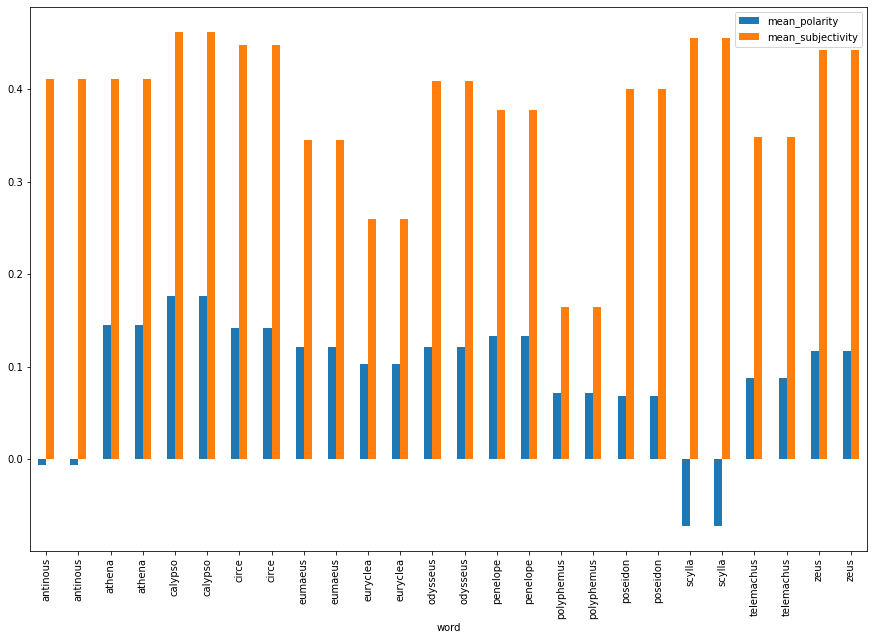

In [72]:
# for metric in metrics:
butl_res.plot(x="word", y=["mean_polarity", "mean_subjectivity"], kind="bar", figsize=(15, 10))

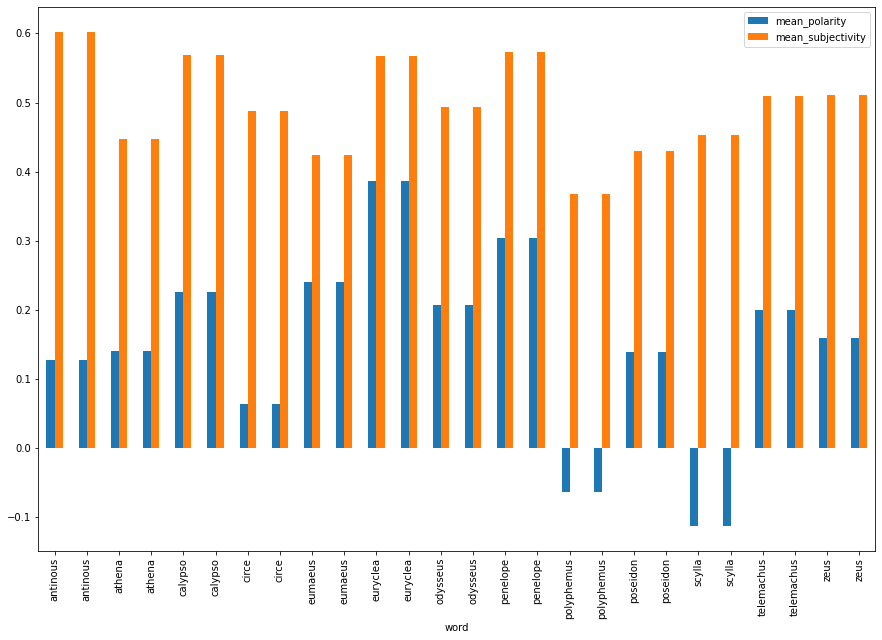

In [75]:
butch_res = get_results(butch_sent_df, plain_char_list).sort_values(by=['word'])
butch_res.plot(x="word", y=["mean_polarity", "mean_subjectivity"], kind="bar", figsize=(15, 10))

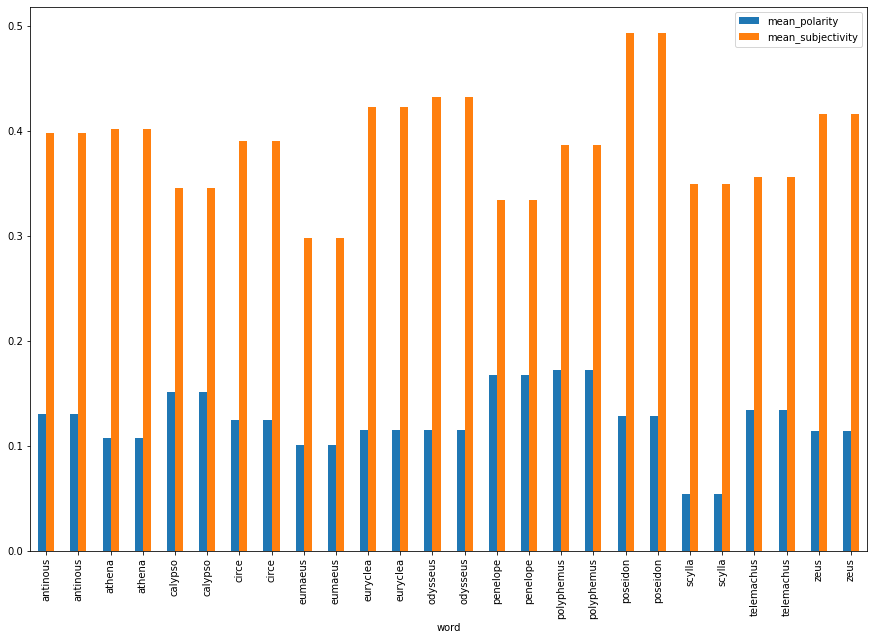

In [76]:
graph_results(pope_sent_df, plain_char_list)

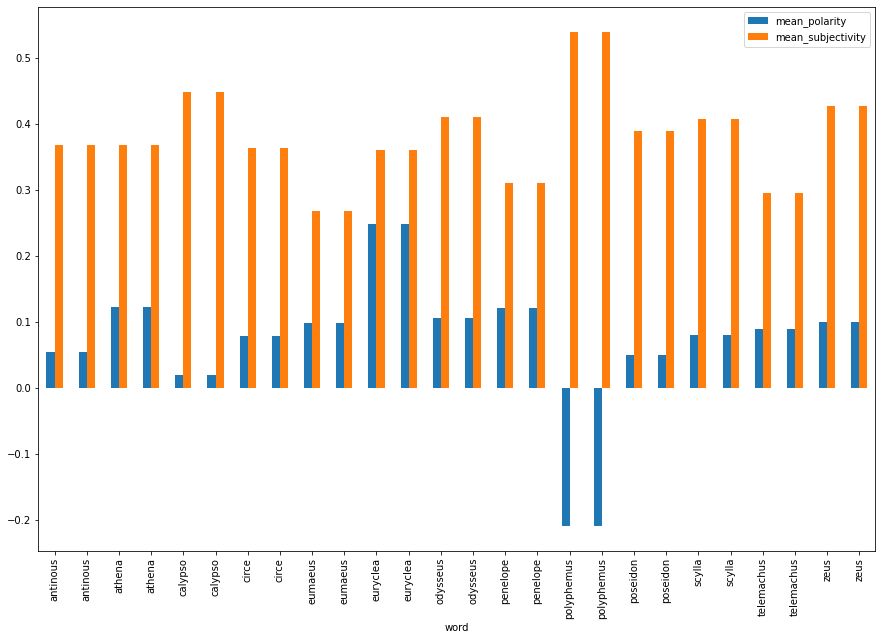

In [77]:
graph_results(cowp_sent_df, plain_char_list)